In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### How many survived and how many died

In [5]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [6]:
print(f"Out of 891- \n(549/891)*100)% people died.\n((342/891)*100)% people survived")

Out of 891- 
(549/891)*100)% people died.
((342/891)*100)% people survived


### NO of male and female

In [7]:

gender_count=df['sex'].value_counts()
print(gender_count)
print(gender_count.index)
print(gender_count.values)

sex
male      577
female    314
Name: count, dtype: int64
Index(['male', 'female'], dtype='object', name='sex')
[577 314]


In [8]:
#bar graph is bi variate graph and it is used for describing categorical,variable and frequency

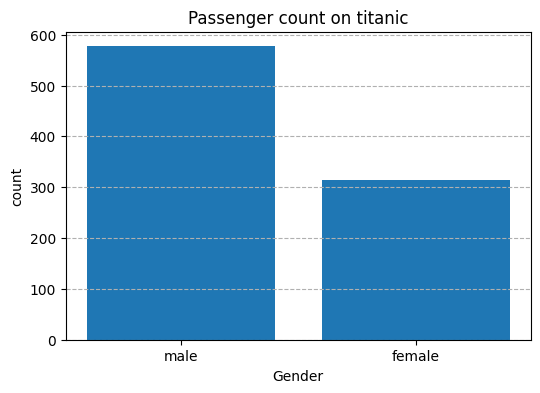

In [9]:
#plotting graph
plt.figure(figsize=(6,4))
plt.bar(gender_count.index,gender_count.values)
plt.xlabel("Gender")
plt.ylabel("count")
plt.title("Passenger count on titanic")
plt.grid(True,axis='y',linestyle='--')

### What was the age distribution

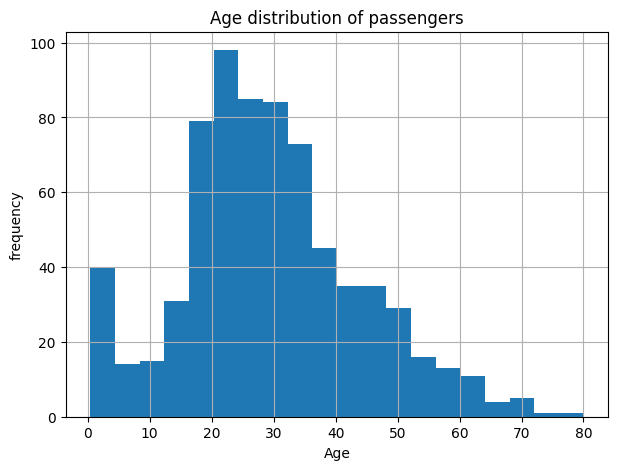

In [10]:
plt.figure(figsize=(7,5))
plt.hist(df['age'].dropna(),bins=20)
plt.title('Age distribution of passengers')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

### Survival Rate based on Gender

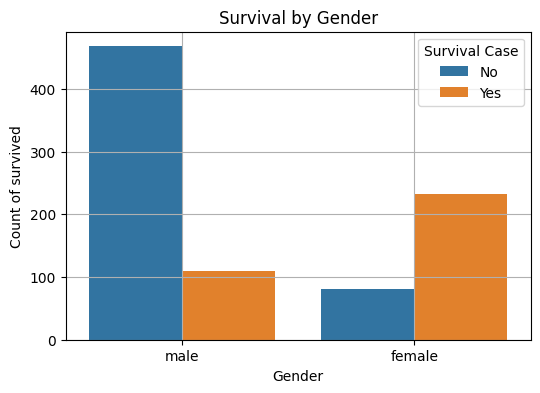

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex',hue='survived',data=df)
plt.title('Survival by Gender')
plt.xlabel("Gender")
plt.ylabel("Count of survived")
plt.legend(title='Survival Case', labels=['No','Yes'])
plt.grid(True)
plt.show()


### How does fare vary with class

Text(0, 0.5, 'Fare count')

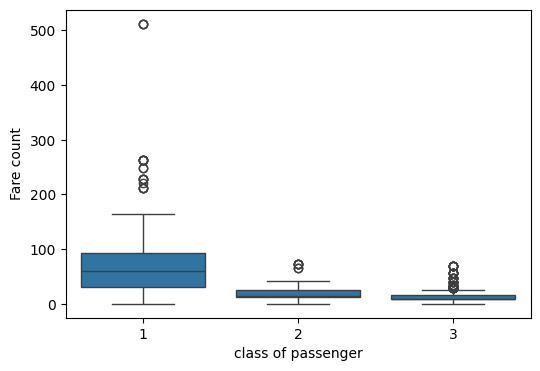

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x='pclass',y='fare',data=df)
plt.xlabel('class of passenger')
plt.ylabel('Fare count')


### Is age related to fare price

Text(0.5, 0, 'Age of passengers')

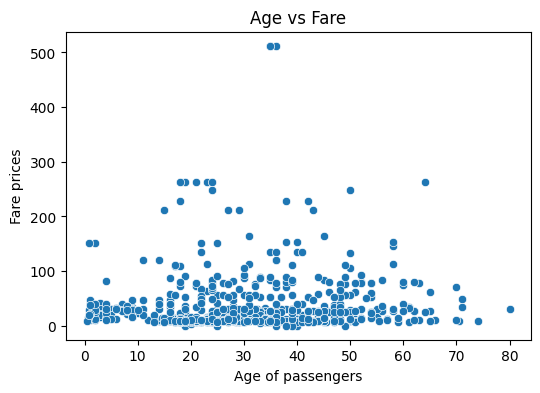

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age',y='fare',data=df)
plt.title('Age vs Fare')
plt.ylabel('Fare prices')
plt.xlabel("Age of passengers")

### How does age and faree vary across survival and gender

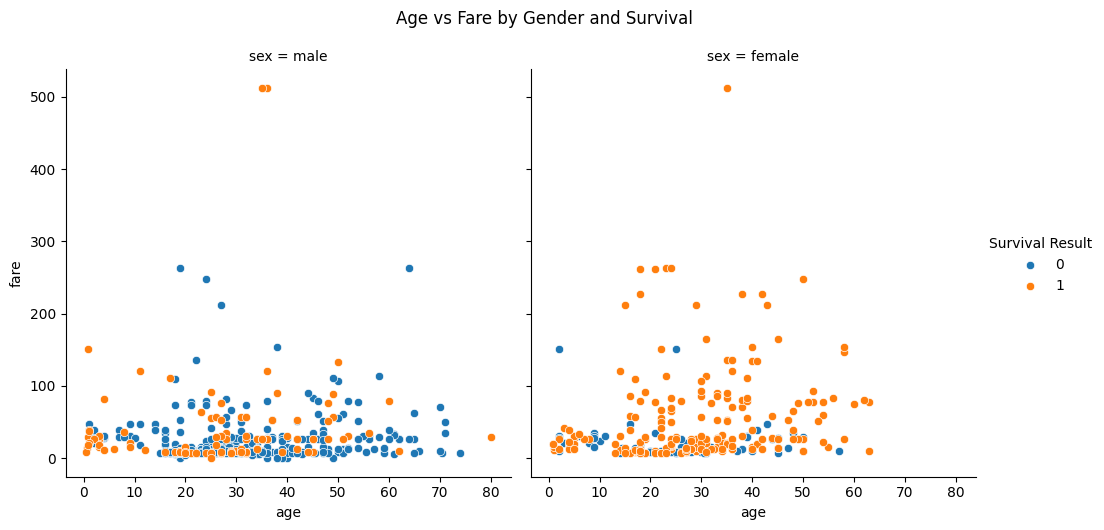

In [14]:
# MULTIVARIATE CHART
g=sns.FacetGrid(df,col='sex',hue='survived',height=5)
g.map_dataframe(sns.scatterplot,x='age',y='fare')
g.add_legend(title='Survival Result')
g.fig.suptitle('Age vs Fare by Gender and Survival',y=1.05)#for gap after y axis
plt.show()

#### 1) Was survival related to gender and passenger class?
#### 2) Does age impact survival differently for men and women
#### 3) Was fare a factor in survival ? Did rich people survive more.
#### 4)Which combination of features seem most related to survival?

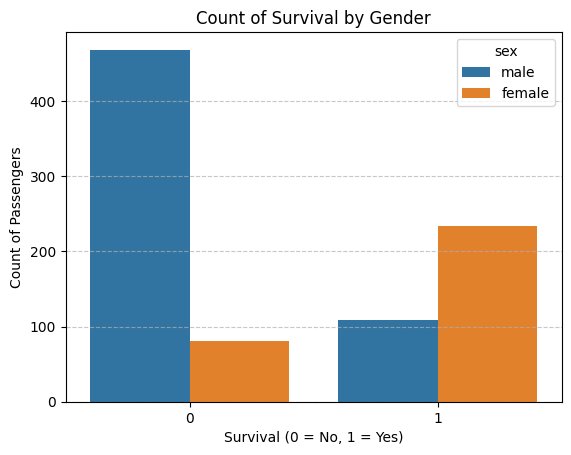

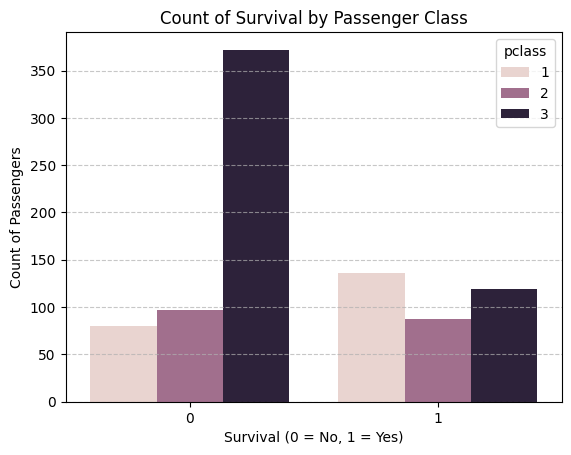

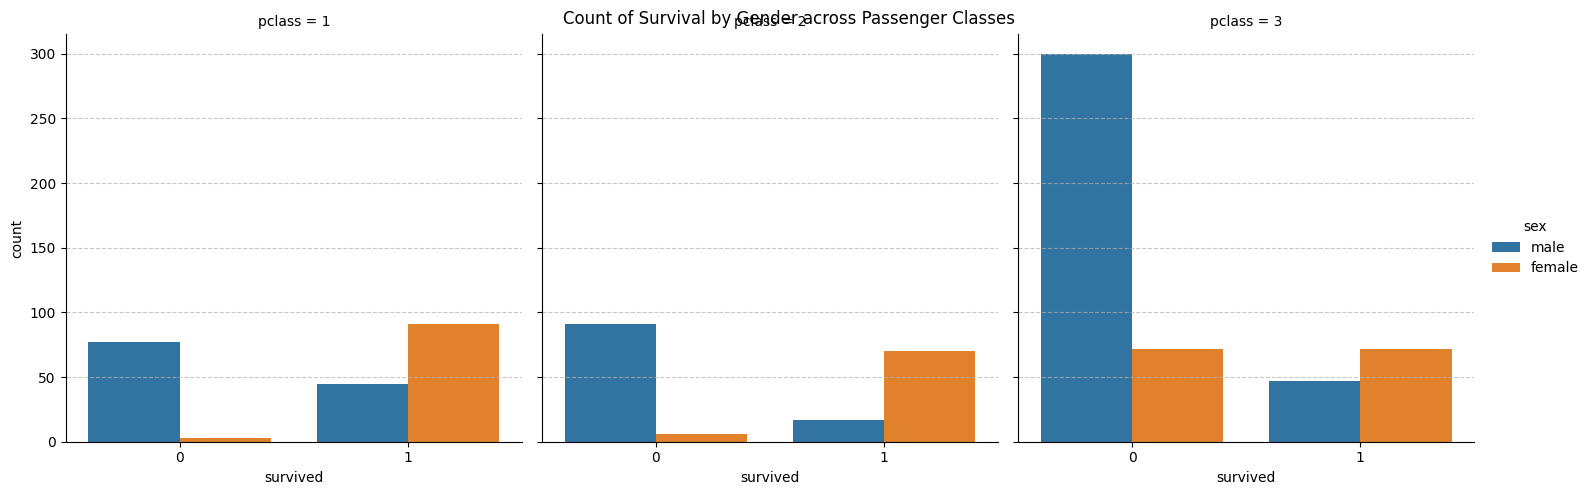

In [57]:
# Count plot of Survived (0 = died, 1 = survived) split by Sex
sns.countplot(x='survived', hue='sex', data=df)
plt.title('Count of Survival by Gender')
plt.xlabel('Survival (0 = No, 1 = Yes)')
plt.ylabel('Count of Passengers')
plt.grid(True ,axis='y', linestyle='--', alpha=0.7)
plt.show()

# Count plot of Survived split by Passenger Class
sns.countplot(x='survived', hue='pclass', data=df)
plt.title('Count of Survival by Passenger Class')
plt.xlabel('Survival (0 = No, 1 = Yes)')
plt.ylabel('Count of Passengers')
plt.grid(True ,axis='y', linestyle='--', alpha=0.7)
plt.show()

# Count plot of Survived split by Passenger Class and Gender (combined)
g=sns.catplot(x='survived', hue='sex', col='pclass', kind='count', data=df )
g.fig.suptitle('Count of Survival by Gender across Passenger Classes', y=1.05)
plt.suptitle('Count of Survival by Gender across Passenger Classes')
for ax in g.axes.flat:
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


In [61]:
#Does age impact survival differently for men and women
df['age_group'] = pd.cut(df['age'], bins=[0,12,18,30,50,80], labels=['child', 'teen', 'young adult', 'adult', 'senior'])

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_binary,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,young adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,young adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,adult


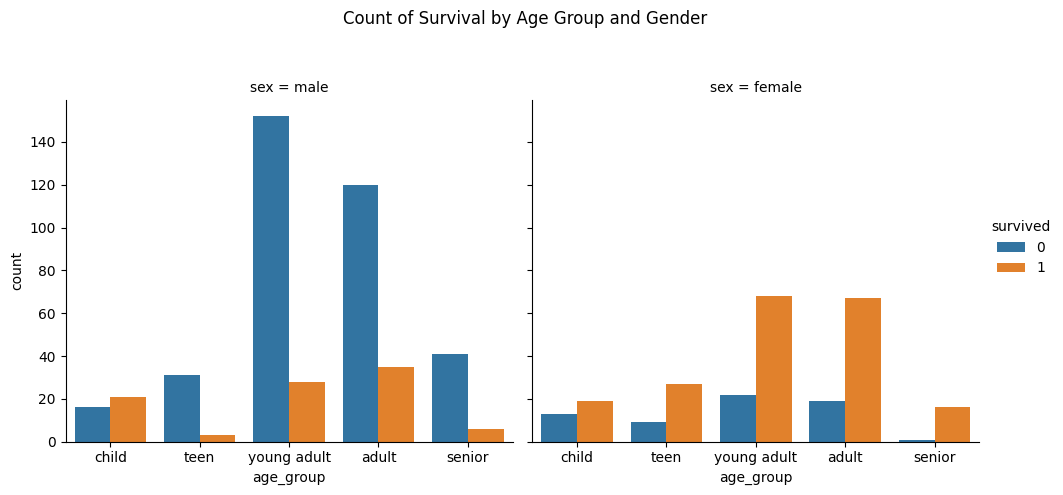

In [62]:
sns.catplot(x='age_group', hue='survived', col='sex', data=df, kind='count')
plt.subplots_adjust(top=0.8)
plt.suptitle('Count of Survival by Age Group and Gender')
plt.show()